In [3]:
# Importing all the necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max.columns',None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the train dataset

df=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X_test.shape

(1459, 80)

In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Starting With EDA

# Missing Features

In [9]:
# Finding out the missing Variables and putting them into a list

missing_features=[features for features in df.columns if df[features].isnull().sum()>=1]
len(missing_features)

19

In [10]:
# How many missing values are there in each feature (Percentage Values%)

for features in missing_features:
    print(features,'has :',np.round((df[features].isnull().mean())*100,4),'% missing Values')

LotFrontage has : 17.7397 % missing Values
Alley has : 93.7671 % missing Values
MasVnrType has : 0.5479 % missing Values
MasVnrArea has : 0.5479 % missing Values
BsmtQual has : 2.5342 % missing Values
BsmtCond has : 2.5342 % missing Values
BsmtExposure has : 2.6027 % missing Values
BsmtFinType1 has : 2.5342 % missing Values
BsmtFinType2 has : 2.6027 % missing Values
Electrical has : 0.0685 % missing Values
FireplaceQu has : 47.2603 % missing Values
GarageType has : 5.5479 % missing Values
GarageYrBlt has : 5.5479 % missing Values
GarageFinish has : 5.5479 % missing Values
GarageQual has : 5.5479 % missing Values
GarageCond has : 5.5479 % missing Values
PoolQC has : 99.5205 % missing Values
Fence has : 80.7534 % missing Values
MiscFeature has : 96.3014 % missing Values


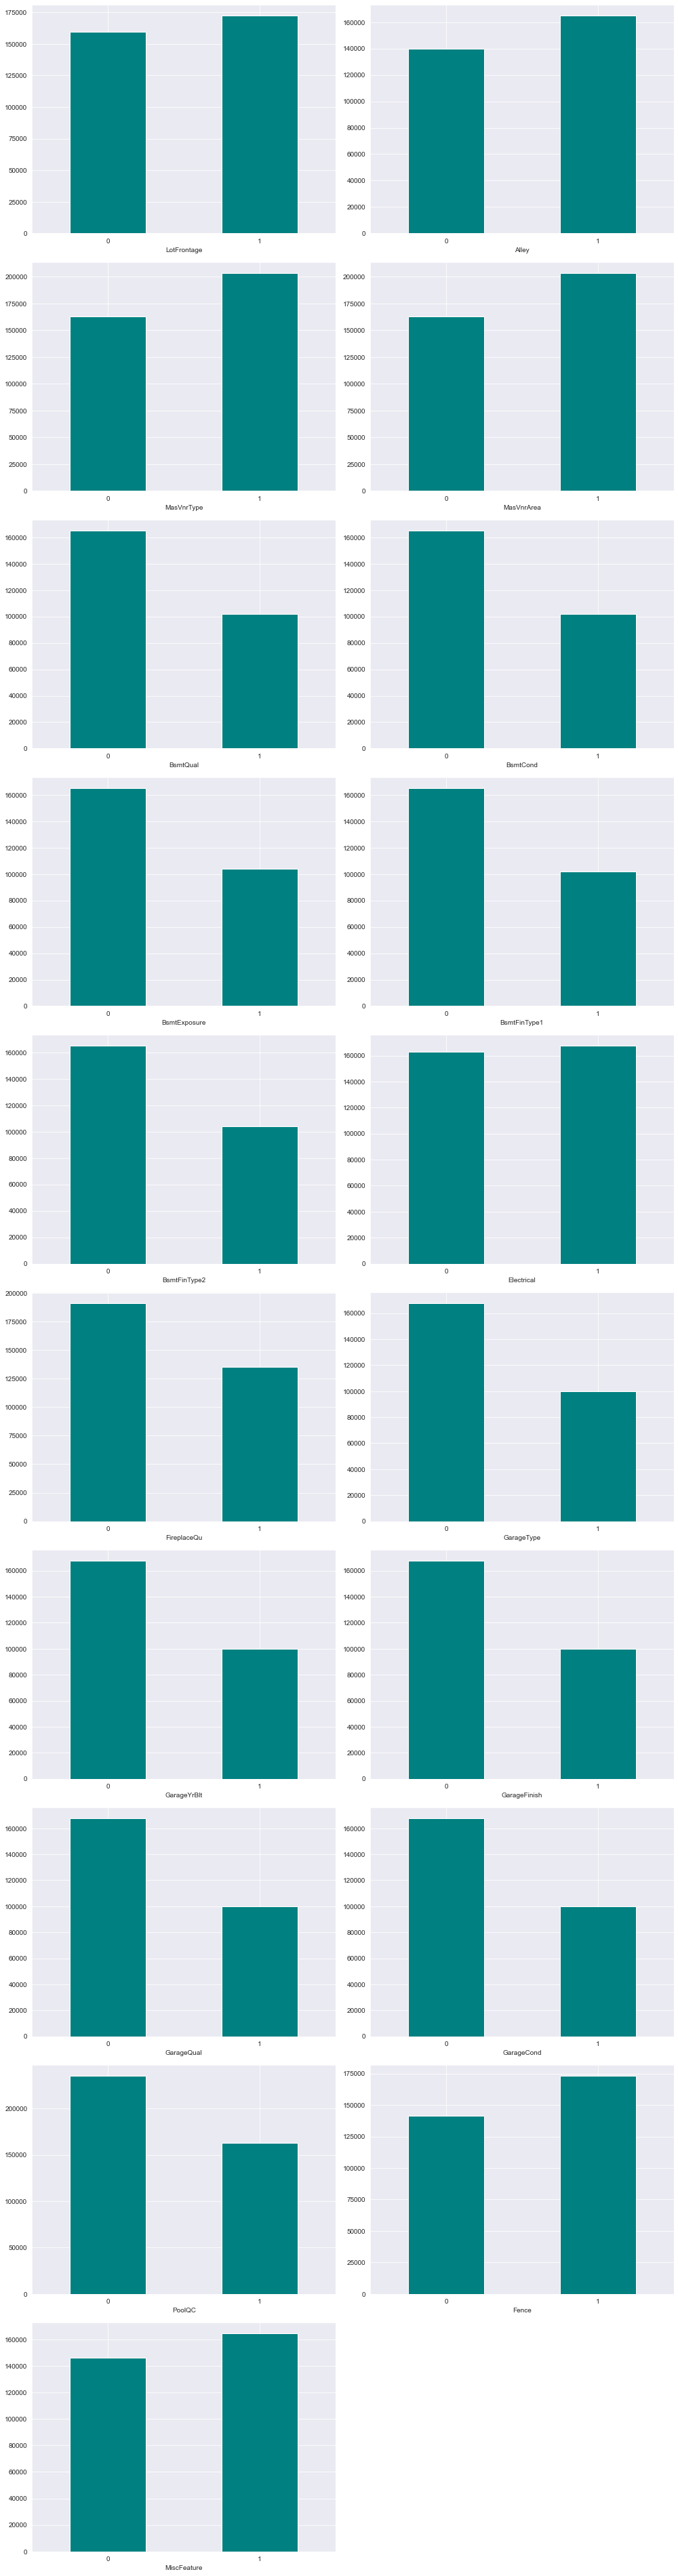

In [11]:
# Establishing the relation between Missing Values and the dependent feature Price
sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,100))

a=len(missing_features) # Number of rows in the subplot
b=2                     # Number of plots in each row
c=1                     # Figure Counter

# Making a copy of the dataset
data=df.copy()  

for features in missing_features:
     # Converting all the null values to 0 & 1
    data[features]=np.where(data[features].isnull(),1,0)
    
    plt.subplot(a,b,c)
    # Ploting the median prices for each feature with respect to missing values.
    data.groupby(features)['SalePrice'].median().plot.bar(color= 'teal')
    plt.xticks(rotation=0) # Using Xticks so that the labels are not inverted as default.
    c=c+1

fig.tight_layout()    
plt.show()

> **From the Above figures we can easily derive that there is clear relationship between sale price and missing features.**
   * Price is higher for missing values in the below features
                  1. Lot Frontage
                  2. Alley
                  3. MasVnrType
                  4. MasVnrArea
                  5. Electrical
                  6. Fence
                  7. Misc Features
   * Price is Lower for missing values in the below features
                  1. Bsmt Quality
                  2. Bsmt Condition
                  3. Bsmt Exposure
                  4. Bsmt FinType 1
                  5. Bsmt FinType 2
                  6. Fireplace Quality
                  7. Garage Type
                  8. Garage YrBuilt
                  9. Garage Finish
                 10. Garage Quality
                 11. Garage Condition
                 12. Pool QC

# Numerical Features

In [12]:
# We will find all the numerical features in the dataset
numerical_features = [features for features in df.columns if df[features].dtype !='O' and features!='Id']
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

> *We have a few Temporal Variables in the Numerical features (All the Year features i.e Datetime Features)*
  **lets Extract the Temporal Variables**

# Temporal Variables

In [13]:
# Temporal Variables
year_feature = [features for features in numerical_features if 'Yr' in features or 'Year' in features]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

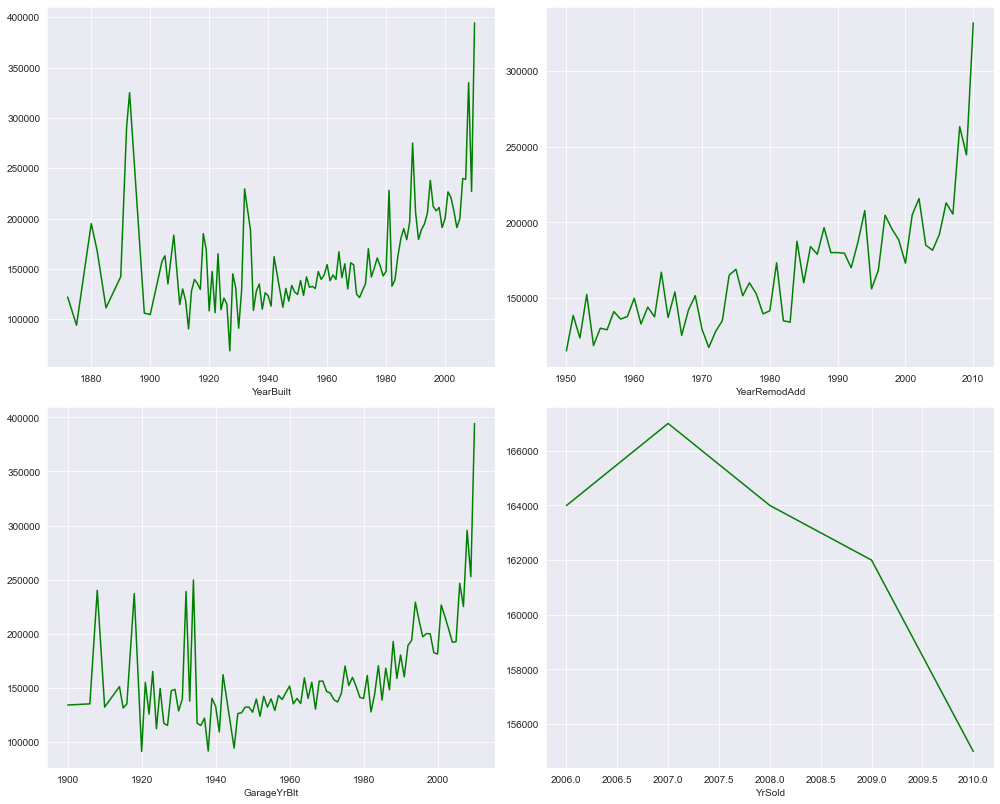

In [14]:
# Establishing relationship between Year Features and dependent feature Sale Prcie

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,22))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df.copy()  # Making a dataset copy

for features in year_feature:
    plt.subplot(a,b,c)
    
    # Plotting median prices for each features grouping by Year
    data.groupby(features)['SalePrice'].median().plot(color='green')
    plt.xticks(rotation=0)  # Using Xticks so that the label in in proper orientation
    c=c+1 # Incrementing figure counter

fig.tight_layout()
plt.show()

> **Conclusion**
* As we can see there is an incremental growth in price as the years keep increasing where as with year sold the price is decreasing.
       1. This may occur for one reason that is the price of the houses are decreasing as the houses are getting older.
 **We will try to verify the same in the next cell.**

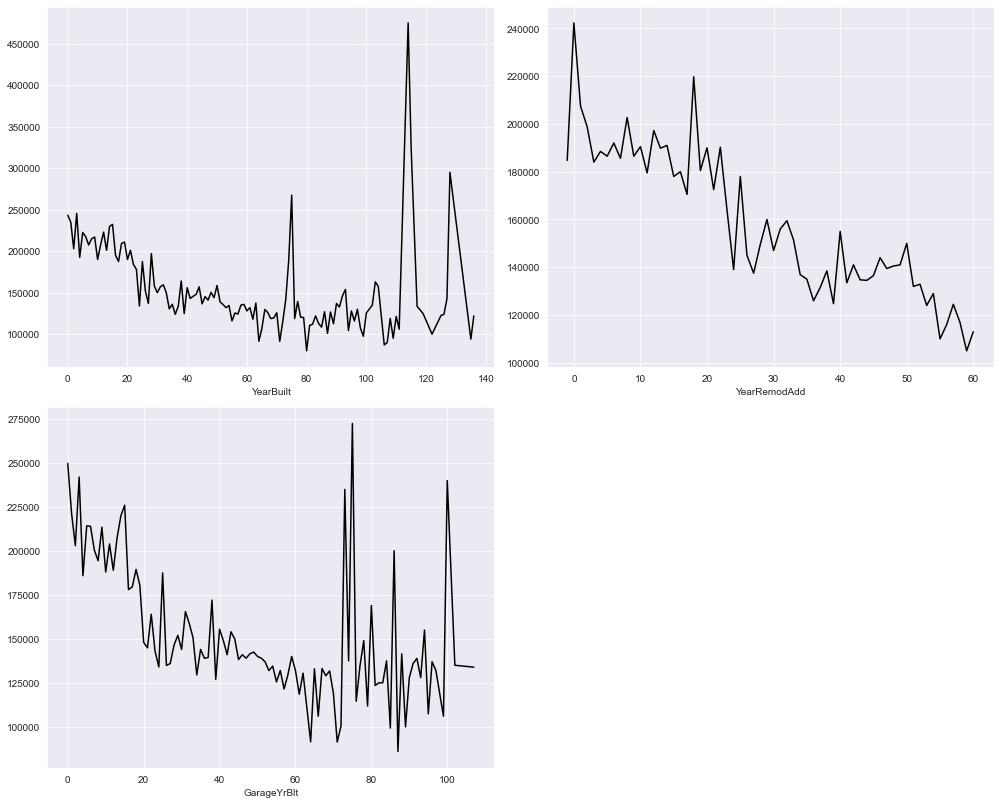

In [15]:
# Lets plot the difference between each Year Feature with YrSold

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,22))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df.copy()  # Making a dataset copy

for features in year_feature:
    if features != 'YrSold':
        # Finding the difference between Year feature and Year Sold
        data[features] = data['YrSold'] - data[features]
        plt.subplot(a,b,c)
        data.groupby(features)['SalePrice'].median().plot(color='black')
        c = c+1

fig.tight_layout()
plt.show()

> **This proves our finding that the Sale Price is decreasing as the age of the houses are increasing**

# Discrete Features (Numerical Features)

In [16]:
# We are considering 25 as the threashold value of discrete featuers.
# Lets get all the discrete features in a list

discrete_features = [features for features in numerical_features if(len(df[features].unique())<25) and features not in year_feature]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

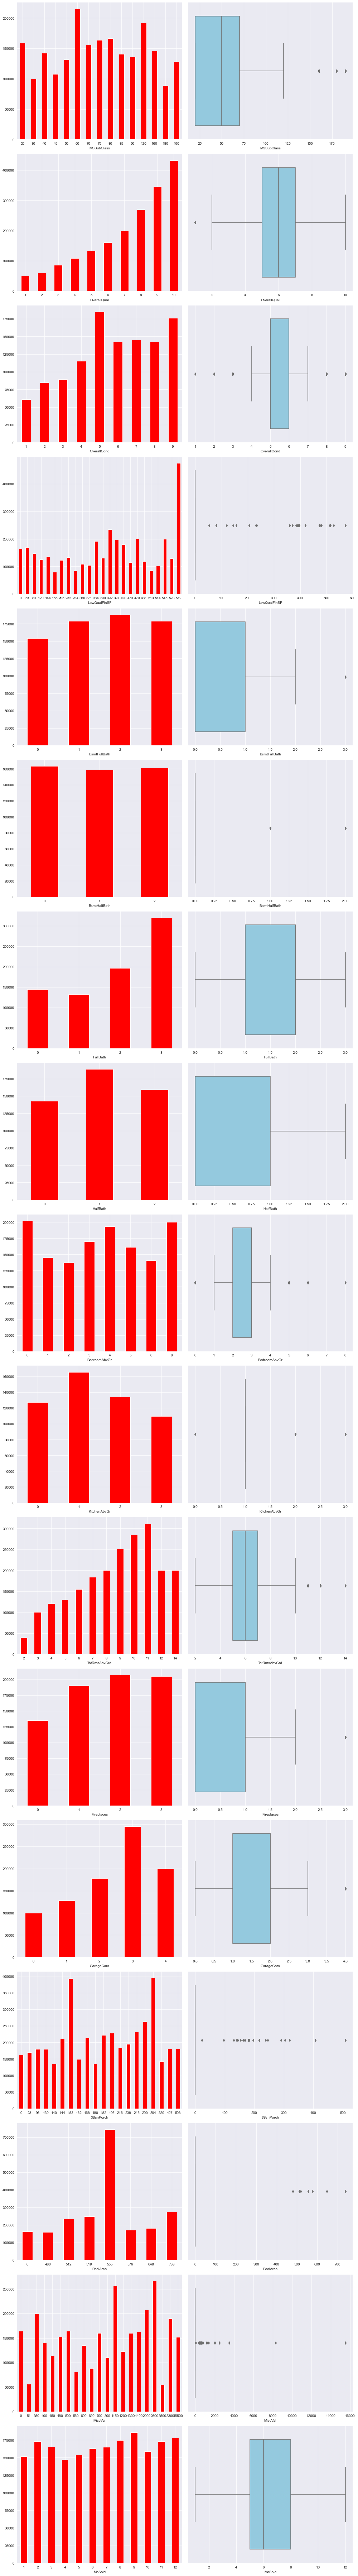

In [17]:
# Exploring relationship between discrete features and dependent feature (SalePrice)

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,100))

a=len(discrete_features)   # No. of rows in subplot
b=2                        # No. of plots in each row
c=1                        # Figure Counter

data=df.copy()  # Making a dataset copy

for features in discrete_features:
    plt.subplot(a,b,c)
    # Plotting median prices for each features grouping by discrete features
    data.groupby(features)['SalePrice'].median().plot(kind='bar',color='red')
    plt.xticks(rotation=0)  # Using Xticks so that the label in in proper orientation
    c = c + 1 # Incrementing figure counter
    
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'skyblue')  # To check for outliers
    c = c + 1  # Incrementing figure counter
     

fig.tight_layout()
plt.show()

> **There is a clear monotonic relationship between between some features with sale price and the others have messy relationship. All the features do have a lot of outliers except MoSold which has be taken care of in the feature engineering part.**

# Continious Features (Numerical Features)

In [18]:
# Lets get all the continious Features in a list

continious_features = [features for features in numerical_features if features not in discrete_features + year_feature + ['Id']]
continious_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

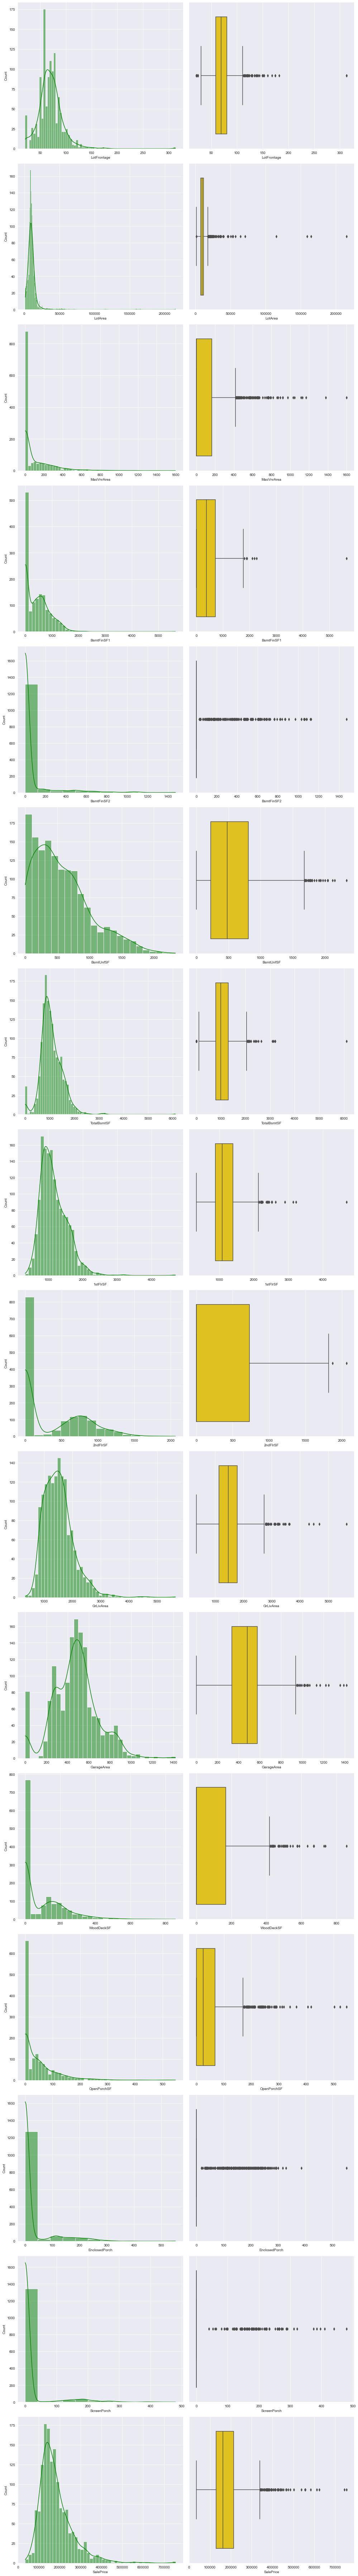

In [19]:
# Lets find the distribution of the continious features.

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,100))

a=len(continious_features)   # No. of rows in subplot
b=2                        # No. of plots in each row
c=1                        # Figure Counter

data=df.copy()  # Making a dataset copy

for features in continious_features:
    plt.subplot(a,b,c)
    # Distribution of the continious features
    sns.histplot(x = data[features], kde = True , color = 'green')
    c = c + 1 # Incrementing figure counter
    
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'gold')  # To check for outliers
    c = c + 1  # Incrementing figure counter
     

fig.tight_layout()
plt.show()

> **The data is right skewed with all the features having outliers. We need to perform log normal transformation on these features.**

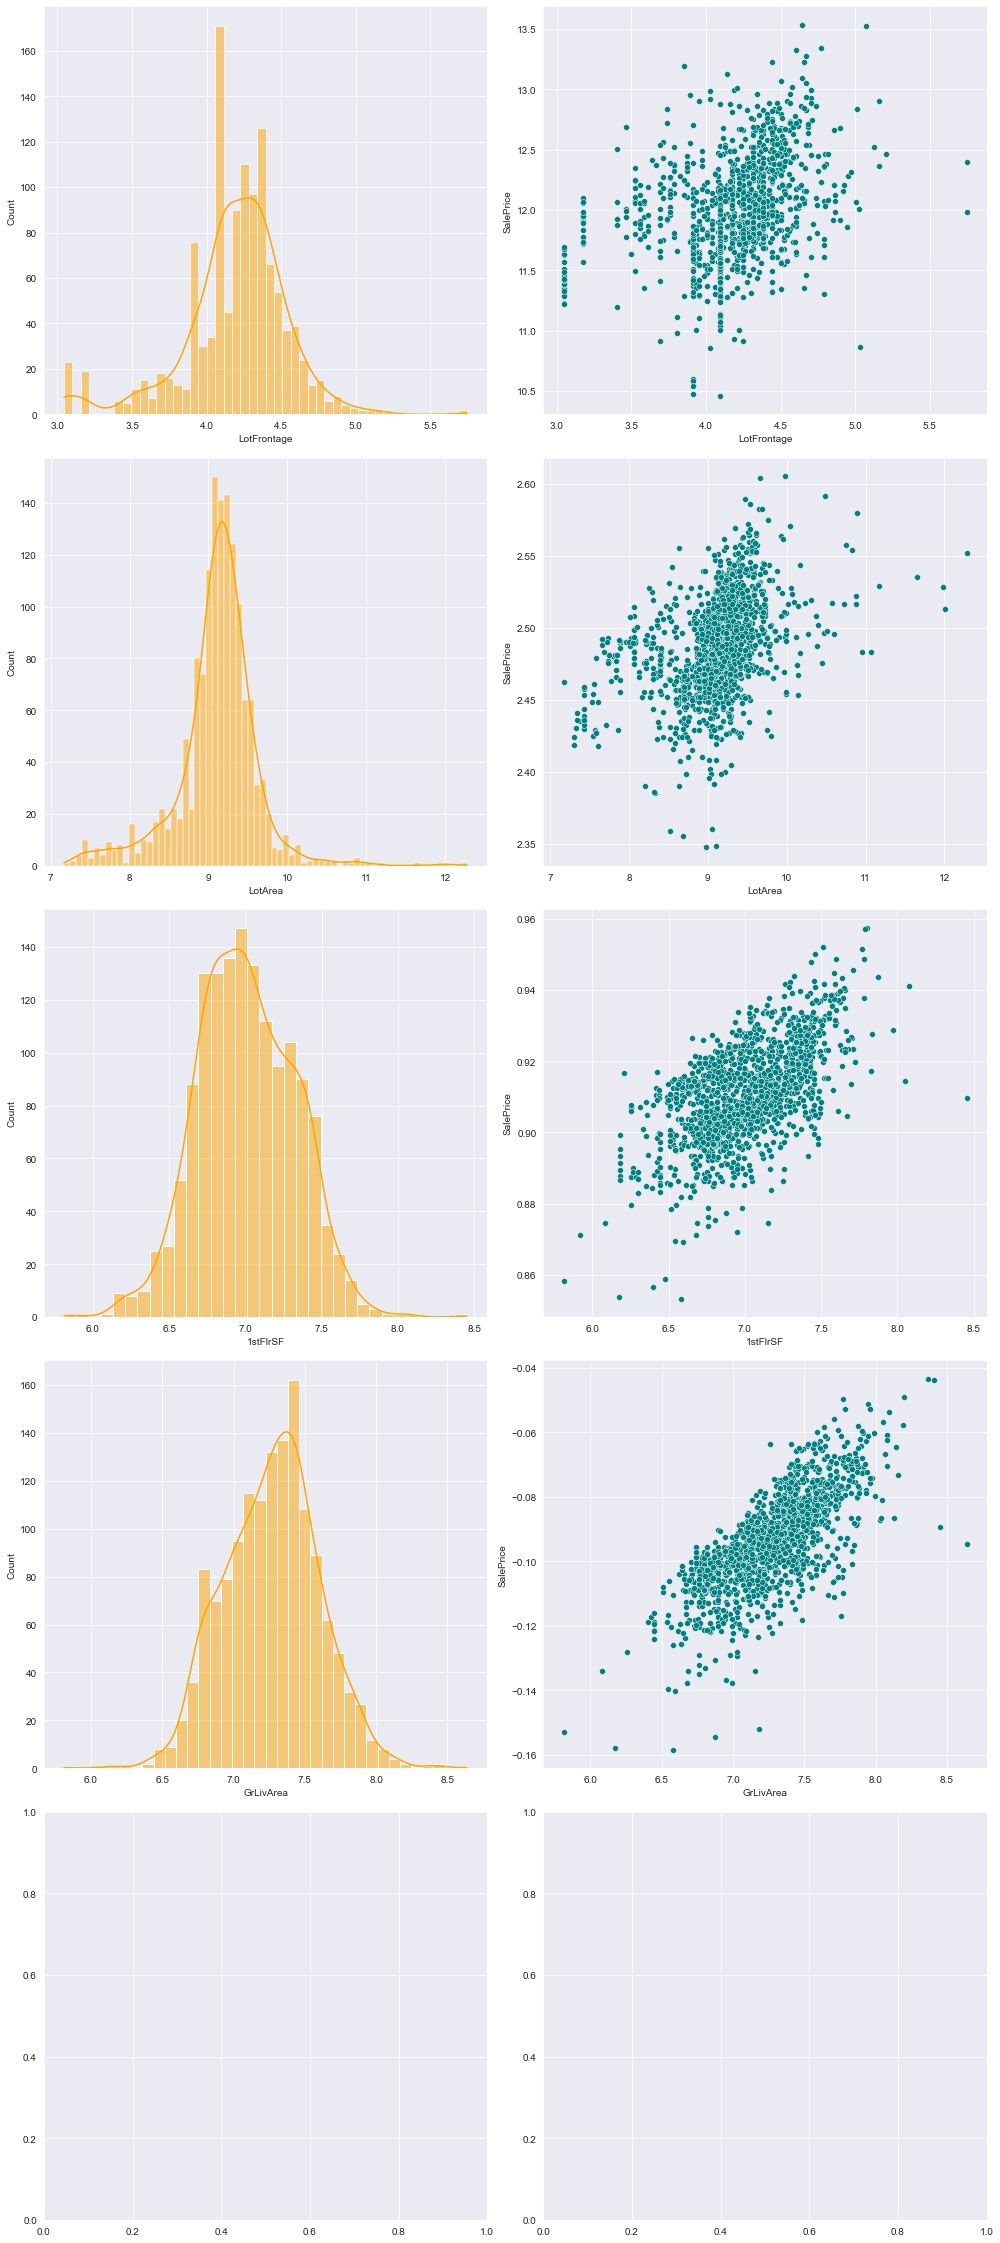

In [20]:
# Log Normal Transformation on the continious features
# Plotting them with dependent features as well

sns.set_style('darkgrid')
fig = plt.figure(figsize=(14,100))

a = len(continious_features)    # No. of rows in the subplot
b = 2                           # No. of columns in each row
c = 1                           # Figure Counter

data = df.copy()

for features in continious_features:
    if (0 in data[features].unique()):            # Explicitly ignoring the 0 values 
        pass
    else:
        plt.subplot(a,b,c)                      
        data[features] = np.log(data[features])                              # Log Normal Transformation
        sns.histplot(x = data[features] , kde=True, color = 'orange')        # Plotting the distributions of the features
        c = c+1
        
        plt.subplot(a,b,c)
        data['SalePrice'] = np.log(data['SalePrice'])                                   # Log Normal Transforation of the dependent feature
        sns.scatterplot(x = data[features] , y = data['SalePrice'] , color = 'teal')    # Plotting dependent feature with log normally distributed continious feature
        c = c+1

fig.tight_layout()
plt.show()

> **After applying log normal distribution we can conclude that there is somewhat of a linear relationship between continious features and Sale Price**

# Categorical Features 

In [21]:
# Lets get all the categorical features in a list

categorical_features = [features for features in df.columns if df[features].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


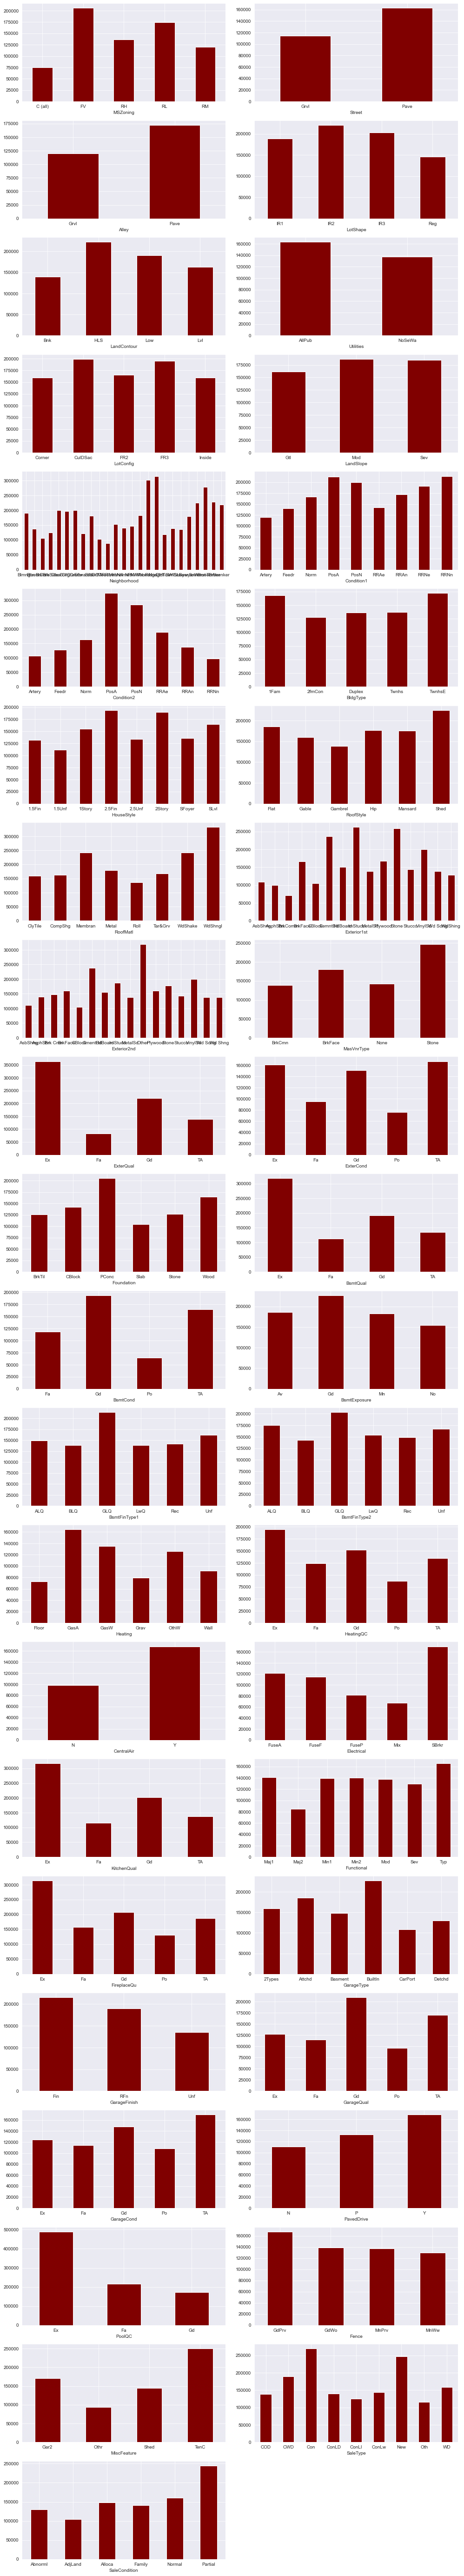

In [23]:
# Lets plot the relationship between categorical features and dependent feature

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,150))

a=len(categorical_features)   # No. of rows in subplot
b=2                           # No. of plots in each row
c=1                           # Figure Counter

data=df.copy()  # Making a dataset copy

for features in categorical_features:
    plt.subplot(a,b,c)
    # Plotting the median values with Sale Price
    data.groupby(features)['SalePrice'].median().plot(color='maroon',kind='bar')
    plt.xticks(rotation=0)
    c = c+1

fig.tight_layout()
plt.show()

> **As we can see in the above plots there are few features with clear relationships and few with messy realtionships. We will use all of above collected data in feature engineering.**

In [24]:
# Exploring how many subclasses are there in each of the categorical features

for features in categorical_features:
    print('There are {} subclasses in {}'.format(len(df[features].unique()),features))
    

There are 5 subclasses in MSZoning
There are 2 subclasses in Street
There are 3 subclasses in Alley
There are 4 subclasses in LotShape
There are 4 subclasses in LandContour
There are 2 subclasses in Utilities
There are 5 subclasses in LotConfig
There are 3 subclasses in LandSlope
There are 25 subclasses in Neighborhood
There are 9 subclasses in Condition1
There are 8 subclasses in Condition2
There are 5 subclasses in BldgType
There are 8 subclasses in HouseStyle
There are 6 subclasses in RoofStyle
There are 8 subclasses in RoofMatl
There are 15 subclasses in Exterior1st
There are 16 subclasses in Exterior2nd
There are 5 subclasses in MasVnrType
There are 4 subclasses in ExterQual
There are 5 subclasses in ExterCond
There are 6 subclasses in Foundation
There are 5 subclasses in BsmtQual
There are 5 subclasses in BsmtCond
There are 5 subclasses in BsmtExposure
There are 7 subclasses in BsmtFinType1
There are 7 subclasses in BsmtFinType2
There are 6 subclasses in Heating
There are 5 subcl

> **So there are a few features which has more then 10 subclasses whereas the rest have around 3-8 subclasses which can be eaisly dealt with OneHotEncoding**

# Featuring Engineering

In [25]:
temp = X_test.copy()
temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
# Lets start with handling the missing values starting with missing values in categorical features

missing_categorical = [features for features in df.columns if df[features].isnull().sum()>=1 and df[features].dtype == 'O']
missing_categorical_temp = [features for features in temp.columns if temp[features].isnull().sum()>=1 and temp[features].dtype == 'O']

for features in missing_categorical:
    print('{} : {} % Null Values'.format(features,np.round(df[features].isnull().mean(),4)))

Alley : 0.9377 % Null Values
MasVnrType : 0.0055 % Null Values
BsmtQual : 0.0253 % Null Values
BsmtCond : 0.0253 % Null Values
BsmtExposure : 0.026 % Null Values
BsmtFinType1 : 0.0253 % Null Values
BsmtFinType2 : 0.026 % Null Values
Electrical : 0.0007 % Null Values
FireplaceQu : 0.4726 % Null Values
GarageType : 0.0555 % Null Values
GarageFinish : 0.0555 % Null Values
GarageQual : 0.0555 % Null Values
GarageCond : 0.0555 % Null Values
PoolQC : 0.9952 % Null Values
Fence : 0.8075 % Null Values
MiscFeature : 0.963 % Null Values


In [27]:
# Replacing missing values in categorial_features with new label "missing"

def replace_cat(dataset,missing_categorical):
    data=dataset.copy()
    data[missing_categorical]=data[missing_categorical].fillna("missing")
    return data


df = replace_cat(df,missing_categorical)
temp = replace_cat(temp,missing_categorical_temp)

In [28]:
df[missing_categorical].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [29]:
temp[missing_categorical].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [30]:
# Missing numerical features

missing_numerical = [features for features in numerical_features if df[features].isnull().sum()>1]
missing_numerical_temp = [features for features in temp.columns if temp[features].isnull().sum()>1 and temp[features].dtype !='O']

In [31]:
# Function to impute missing numerical features

def replace_num(dataset,missing):
    
    for features in missing:
        median = dataset[features].median()
        dataset[features] = dataset[features].fillna(median)
    return dataset

In [32]:
# Calling the impute function for train data
df = replace_num(df,missing_numerical)

df[missing_numerical].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [33]:
# Calling the impute function for test data
temp = replace_num(temp,missing_numerical_temp)

temp[missing_numerical_temp].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [34]:
missing_temp = [features for features in temp.columns if (temp[features].isnull().sum()>=1)]
temp[missing_temp]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageCars,GarageArea
0,468.0,144.0,270.0,882.0,1.0,730.0
1,923.0,0.0,406.0,1329.0,1.0,312.0
2,791.0,0.0,137.0,928.0,2.0,482.0
3,602.0,0.0,324.0,926.0,2.0,470.0
4,263.0,0.0,1017.0,1280.0,2.0,506.0
...,...,...,...,...,...,...
1454,0.0,0.0,546.0,546.0,0.0,0.0
1455,252.0,0.0,294.0,546.0,1.0,286.0
1456,1224.0,0.0,0.0,1224.0,2.0,576.0
1457,337.0,0.0,575.0,912.0,0.0,0.0


In [35]:
temp = replace_num(temp,missing_temp)

temp[missing_temp].isnull().sum()

BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
GarageCars     0
GarageArea     0
dtype: int64

In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [37]:
temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,1,2010,WD,Normal


In [38]:
# Dropping Id column
df = df.drop('Id',axis=1)

In [39]:
# Dropping Id column
ID = temp['Id']
temp = temp.drop('Id',axis=1)

# Log Normal Transformation

In [40]:
log_transform = [features for features in numerical_features if features not in year_feature]
log_transform

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [41]:
# Log Normal Transformnation of numerical features

def log_normal(dataframe,log_transform):
    for i in log_transform:
        if(0 in dataframe[i].unique()):
            pass
        else:
            dataframe[i] = np.log(dataframe[i])
    return dataframe
    

In [42]:
df = log_normal(df,log_transform)

In [43]:
log_transform_temp = [features for features in numerical_features if features not in year_feature and features!= 'SalePrice']

In [44]:
log_transform_temp

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [45]:
# Function to do log normal transformation

def log_normal_temp(dataframe,log_transform_temp):
    for i in log_transform_temp:
        if(0 in dataframe[i].unique()):
            pass
        else:
            dataframe[i] = np.log(dataframe[i])
    return dataframe

In [46]:
temp = log_normal_temp(temp,log_transform_temp)

In [47]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,0.693147,2008,WD,Normal,12.247694
1,2.995732,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,1.609438,2007,WD,Normal,12.109011
2,4.094345,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,2.197225,2008,WD,Normal,12.317167
3,4.248495,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,0.693147,2006,WD,Abnorml,11.849398
4,4.094345,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,2.484907,2008,WD,Normal,12.429216


In [48]:
temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2.995732,RH,4.382027,9.360655,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,1.609438,1.791759,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,1.609438,Typ,0,missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,1.791759,2010,WD,Normal
1,2.995732,RL,4.394449,9.565704,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,1.791759,1.791759,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,1.791759,Typ,0,missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,Gar2,12500,1.791759,2010,WD,Normal
2,4.094345,RL,4.304065,9.534595,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.609438,1.609438,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,1.791759,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,1.098612,2010,WD,Normal
3,4.094345,RL,4.356709,9.208138,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.791759,1.791759,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,1.945910,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,1.791759,2010,WD,Normal
4,4.787492,RL,3.761200,8.518193,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,2.079442,1.609438,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,1.609438,Typ,0,missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,0.000000,2010,WD,Normal


# Handling Rare Categorical Features

In [49]:
# Making a copy of the dataset

data = df.copy()
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,0.693147,2008,WD,Normal,12.247694
1,2.995732,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,1.609438,2007,WD,Normal,12.109011
2,4.094345,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,2.197225,2008,WD,Normal,12.317167
3,4.248495,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,0.693147,2006,WD,Abnorml,11.849398
4,4.094345,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,2.484907,2008,WD,Normal,12.429216


In [50]:
from feature_engine.encoding import RareLabelEncoder
encoder = RareLabelEncoder(tol = 0.01,n_categories=9,replace_with='Rare')

In [51]:
# We will find the features that have rare categorical features or features who has sub categories less than 1% frequency.

data = encoder.fit_transform(data)
for features in ['Neighborhood', 'Condition1', 'Exterior1st', 'Exterior2nd' ,'SaleType']:
    data[features + "_rare"] = np.where(data[features]=="Rare",1,0) 
    

In [52]:
# We will find the features that have rare categorical features or features who has sub categories less than 1% frequency.

temp = encoder.fit_transform(temp)
for features in ['Neighborhood', 'Condition1', 'Exterior1st', 'Exterior2nd' ,'SaleType']:
    temp[features + "_rare"] = np.where(temp[features]=="Rare",1,0) 
    

In [53]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_rare,Condition1_rare,Exterior1st_rare,Exterior2nd_rare,SaleType_rare
0,4.094345,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,0.693147,2008,WD,Normal,12.247694,0,0,0,0,0
1,2.995732,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,1.791759,2.079442,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,1.609438,2007,WD,Normal,12.109011,1,0,0,0,0
2,4.094345,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,2.197225,2008,WD,Normal,12.317167,0,0,0,0,0
3,4.248495,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,0.693147,2006,WD,Abnorml,11.849398,0,0,0,0,0
4,4.094345,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,2.484907,2008,WD,Normal,12.429216,0,0,0,0,0


In [54]:
df = data

In [55]:
temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Neighborhood_rare,Condition1_rare,Exterior1st_rare,Exterior2nd_rare,SaleType_rare
0,2.995732,RH,4.382027,9.360655,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,1.609438,1.791759,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,1.609438,Typ,0,missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,1.791759,2010,WD,Normal,0,0,0,0,0
1,2.995732,RL,4.394449,9.565704,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,1.791759,1.791759,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,1.791759,Typ,0,missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,Gar2,12500,1.791759,2010,WD,Normal,0,0,0,0,0
2,4.094345,RL,4.304065,9.534595,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.609438,1.609438,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,1.791759,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,1.098612,2010,WD,Normal,0,0,0,0,0
3,4.094345,RL,4.356709,9.208138,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.791759,1.791759,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,1.945910,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,1.791759,2010,WD,Normal,0,0,0,0,0
4,4.787492,RL,3.761200,8.518193,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,2.079442,1.609438,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,1.609438,Typ,0,missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,0.000000,2010,WD,Normal,0,0,0,0,0


# Temporal Variables

In [56]:
# As seen in earlier EDA prices of the house directly depends on age of the house
year = [features for features in year_feature if features != 'YrSold']
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [57]:
for features in year:
    df[features] = df['YrSold'] - df[features]

In [58]:
for features in year:
    temp[features] = temp['YrSold'] - temp[features]

In [59]:
df[year].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [60]:
temp[year].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


# One Hot Encoding & Label Encoding

In [61]:
# So during EDA we found that there were many features which has an exponential relationship with dependent variable Sale Price, 
# So we will label Encode those features and rest would be done using One Hot Encoder. With this strategy we can give our model a clear relationship between the features.

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

lebel_encoder = LabelEncoder()
One_encoder = OneHotEncoder(drop='first')

In [62]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_rare,Condition1_rare,Exterior1st_rare,Exterior2nd_rare,SaleType_rare
0,4.094345,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,0.693147,2008,WD,Normal,12.247694,0,0,0,0,0
1,2.995732,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,1.791759,2.079442,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,1.609438,2007,WD,Normal,12.109011,1,0,0,0,0
2,4.094345,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,2.197225,2008,WD,Normal,12.317167,0,0,0,0,0
3,4.248495,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,0.693147,2006,WD,Abnorml,11.849398,0,0,0,0,0
4,4.094345,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,2.484907,2008,WD,Normal,12.429216,0,0,0,0,0


In [63]:
# categorical features which only have Two sub categories
two_subcat = [features for features in categorical_features if len(df[features].unique())==2]
df[two_subcat]

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
...,...,...,...
1455,Pave,AllPub,Y
1456,Pave,AllPub,Y
1457,Pave,AllPub,Y
1458,Pave,AllPub,Y


In [64]:
# Getting all the elements which has only two unique categories inside them
two_subcat_temp = [features for features in categorical_features if len(temp[features].unique())==2]
temp[two_subcat_temp]

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
...,...,...,...
1454,Pave,AllPub,Y
1455,Pave,AllPub,Y
1456,Pave,AllPub,Y
1457,Pave,AllPub,Y


In [65]:
# Categorical features which have two sub categories are convetred into numerical counter-part.
data = df.copy()

for features in two_subcat:
    lis = data[features].unique()
    data[features] = np.where(data[features]==lis[0],1,0)

In [66]:
# Doing the same for the test data
for features in two_subcat_temp:
    lis_temp = temp[features].unique()
    temp[features] = np.where(temp[features]==lis_temp[0],1,0)

In [67]:
# Label Encoding rest of the categorical features
for c in categorical_features:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(data[c].values)) 
    data[c] = label_encoder.transform(list(data[c].values))

In [68]:
# Doing the same for test data
for c in categorical_features:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(temp[c].values)) 
    temp[c] = label_encoder.transform(list(temp[c].values))

In [69]:
# Giving back the dataset after manupulation
df = data

In [70]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,1,4,0,4,2,2,0,5,1,1,8,8,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,1,2,0,16,1,2,0,2,1,1,4,4,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,1,4,0,4,2,2,0,5,1,1,8,8,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,1,0,0,5,2,2,0,5,1,1,9,10,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,1,2,0,13,2,2,0,5,1,1,8,8,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4


In [71]:
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_rare,Condition1_rare,Exterior1st_rare,Exterior2nd_rare,SaleType_rare
278,2.995732,3,4.672829,9.578450,1,2,3,3,1,4,0,14,2,2,0,2,2.197225,1.609438,1,0,1,1,2,2,1,315.0,0,4,2,0,3,1,5,0,5,0,2121,2121,1,0,1,4,7.659643,0,0,7.659643,0,0,2,1,3,1,0,2.079442,6,1,0,1,0.0,0,3,732,4,4,2,124,98,0,0,142,0,3,4,4,0,1.609438,2007,6,5,12.936752,0,0,0,0,0
1164,4.382027,3,4.234107,9.690109,1,2,0,3,1,2,0,16,1,2,0,7,1.609438,1.945910,29,29,1,1,5,5,2,0.0,3,4,2,2,3,1,0,680,4,391,289,1360,1,0,1,4,7.266827,0,0,7.266827,1,0,1,1,2,1,2,1.609438,6,1,4,1,29.0,2,2,588,4,4,2,168,180,0,0,0,0,3,4,4,0,1.791759,2007,8,4,12.175613,1,0,0,0,0
579,3.912023,4,4.394449,9.405084,1,0,3,3,1,4,0,15,2,2,0,0,1.609438,1.609438,54,54,1,1,4,4,1,335.0,3,4,0,3,3,3,5,0,5,0,1050,1050,1,0,0,1,6.956545,745,0,7.492760,0,0,2,0,4,1,3,1.945910,6,0,5,1,54.0,2,1,352,1,4,2,0,0,0,0,0,0,3,4,4,0,2.397895,2008,8,4,11.786762,0,0,0,0,0
1100,3.401197,3,4.094345,9.035987,1,2,3,0,1,4,0,17,2,2,0,2,0.693147,1.609438,89,59,1,1,9,9,2,0.0,3,4,1,3,0,3,4,290,5,0,0,290,1,4,0,1,6.082219,0,0,6.082219,0,0,1,0,1,1,1,1.098612,6,0,5,5,79.0,2,1,246,4,4,0,0,0,0,0,0,0,3,4,4,0,0.000000,2009,8,4,11.002100,0,0,0,0,0
171,2.995732,3,4.948760,10.366278,1,2,0,3,1,0,0,11,2,2,0,2,1.791759,1.609438,50,50,3,1,1,5,3,112.0,3,4,1,3,1,1,1,639,5,0,441,1080,1,1,1,4,7.412160,0,0,7.412160,1,0,1,0,3,1,3,1.945910,6,2,2,1,50.0,0,2,528,4,4,1,210,62,0,0,0,0,3,4,4,0,1.609438,2010,8,4,12.278393,0,0,0,0,0
842,4.382027,3,4.406719,9.107200,1,2,3,3,1,4,0,11,2,2,0,7,1.791759,1.945910,42,42,1,1,3,3,1,183.0,3,4,1,3,3,1,4,312,0,539,276,1127,1,4,1,4,7.060476,0,0,7.060476,1,0,1,1,3,1,3,1.791759,6,0,5,1,42.0,1,2,490,2,2,2,0,129,0,0,0,0,3,0,4,0,1.609438,2008,8,4,12.071970,0,0,0,0,0
340,4.094345,3,4.442651,9.560363,1,2,3,3,1,4,0,22,2,2,0,5,2.079442,1.609438,8,8,1,1,8,8,2,0.0,2,4,2,2,3,3,5,0,5,0,967,967,1,0,1,4,6.900731,915,0,7.553811,0,0,2,1,4,1,2,2.197225,6,0,5,1,8.0,0,2,431,4,4,2,135,0,0,0,0,0,3,4,4,0,1.386294,2010,8,4,12.220469,0,0,0,0,0
1371,4.382027,3,4.382027,9.169518,1,2,3,3,1,4,0,11,2,2,0,7,1.791759,1.791759,53,12,3,1,0,0,2,0.0,3,4,1,3,3,0,1,831,5,0,161,992,1,2,1,4,7.415175,0,0,7.415175,1,0,1,0,3,1,2,2.079442,6,1,4,3,53.0,1,1,377,4,4,2,0,28,0,0,178,0,3,2,4,0,2.302585,2008,8,4,12.016726,0,0,0,0,0
1037,4.094345,3,4.234107,9.131297,1,2,3,3,1,4,0,4,2,2,0,5,2.079442,1.609438,7,6,1,1,8,8,1,396.0,2,4,2,2,3,3,5,0,5,0,1055,1055,1,0,1,4,6.961296,1208,0,7.724447,0,0,2,1,3,1,2,1.945910,6,1,4,3,7.0,0,2,905,4,4,2,0,45,0,0,189,0,3,4,4,0,2.197225,2008,8,4,12.567237,0,0,0,0,0
581,2.995732,3,4.584967,9.449672,1,2,3,3,1,4,0,14,2,2,0,2,2.079442,1.609438,1,0,3,1,8,8,1,306.0,0,4,2,0,3,3,5,0,5,0,2042,2042,1,0,1,4,7.621685,0,0,7.621685,0,0,2,1,3,1,0,2.079442,6,1,2,1,0.0,1,3,1390,4,4,2,0,90,0,0,0,0,3,4,4,0,2.079442,2009,6,5,12.442302,0,0,0,0,0


In [72]:
# Dropping Sale Price from X_train
X_train = df.drop('SalePrice',axis=1)

In [73]:
# Getting all the features except ID and SALE PRICE because we need them as column names after feature scaling
features = [features for features in df.columns if features not in ['SalePrice','Id']]

In [74]:
X_train.shape

(1460, 84)

In [75]:
temp.shape

(1459, 84)

In [76]:
# Using StandardScaler for scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
temp = scaler.transform(temp)

In [77]:
# Converting the array returned by sclaer to dataframe
temp = pd.DataFrame(scaler.transform(temp),columns=features)

In [78]:
# Converting the array returned by sclaer to dataframe for X_train
X_train = pd.concat([df['SalePrice'].reset_index(drop=True),pd.DataFrame(scaler.transform(X_train),columns=features)],axis=1)

In [79]:
X_train.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Neighborhood_rare,Condition1_rare,Exterior1st_rare,Exterior2nd_rare,SaleType_rare
0,12.247694,0.430516,-0.045532,-0.075869,-0.133231,0.064238,0.244717,0.750731,0.314667,0.02618,0.604670,-0.225716,-1.214254,-0.036289,-0.03174,-0.411691,1.026689,0.684385,-0.440508,-1.043259,-0.869941,-0.491516,-0.125797,0.766689,0.753686,-1.216485,0.514104,-0.777976,0.364207,0.835599,-0.339830,0.232937,0.591905,-0.434989,0.575425,0.272847,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.301599,-0.803570,1.161852,-0.120242,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.943826,0.255978,-0.951226,0.854650,-0.768736,-1.008328,-0.318475,0.311725,0.351000,0.11211,0.0689,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.900988,0.138777,0.313867,0.208502,-0.123689,0.0,-0.069409,-0.137265,0.0
1,12.109011,-1.128983,-0.045532,0.572424,0.113442,0.064238,0.244717,0.750731,0.314667,0.02618,-0.628316,-0.225716,0.852963,-1.188074,-0.03174,-0.411691,-0.543457,0.045487,1.884487,-0.183465,0.390141,-0.491516,-0.125797,-0.740368,-0.807692,0.356649,-0.570750,0.663451,0.364207,-0.549162,-0.339830,0.232937,-1.124444,-1.502357,1.171992,0.272847,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.301599,0.418585,-0.795163,-0.120242,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.208385,0.255978,0.600495,0.139585,-0.768736,0.073805,-0.318475,0.311725,-0.060731,0.11211,0.0689,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.212383,-0.614439,0.313867,0.208502,8.084778,0.0,-0.069409,-0.137265,0.0
2,12.317167,0.430516,-0.045532,0.065007,0.420061,0.064238,0.244717,-1.378933,0.314667,0.02618,0.604670,-0.225716,-1.214254,-0.036289,-0.03174,-0.411691,1.026689,0.684385,-0.440508,-0.977121,-0.821476,-0.491516,-0.125797,0.766689,0.753686,-1.216485,0.325915,-0.777976,0.364207,0.835599,-0.339830,0.232937,-0.266269,-0.434989,0.092907,0.272847,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.301599,-0.576560,1.189351,-0.120242,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.208385,0.255978,0.600495,0.139585,-0.768736,-0.925087,-0.318475,0.311725,0.631726,0.11211,0.0689,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.870832,0.138777,0.313867,0.208502,-0.123689,0.0,-0.069409,-0.137265,0.0
3,11.849398,0.649335,-0.045532,-0.325778,0.103347,0.064238,0.244717,-1.378933,0.314667,0.02618,-1.861302,-0.225716,-1.041986,-0.036289,-0.03174,-0.411691,1.026689,0.684385,-0.440508,1.800676,0.632464,-0.491516,-0.125797,1.143454,1.534375,0.356649,-0.570750,0.663451,0.364207,-1.933923,0.772619,-2.724353,0.591905,-1.502357,-0.499274,0.272847,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.301599,-0.439287,0.937276,-0.120242,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.409012,0.255978,0.600495,-1.290545,1.301075,-0.883467,0.801942,1.650307,0.790804,0.11211,0.0689,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,0

In [80]:
# Getting all the dependent feture values
y_train = X_train['SalePrice'].values

In [81]:
# Dropping Sale Price from tain data
X_train = X_train.drop('SalePrice',axis=1)

# Feature Selection

In [82]:
# Using Lasso for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [83]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [84]:
# Getting all the important features
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False])

In [85]:
# A total of 23 features are selected
selected = X_train.columns[(feature_sel_model.get_support())]
len(selected)

43

In [86]:
# All the important features
selected

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'MiscFeature',
       'SaleCondition', 'Exterior1st_rare'],
      dtype='object')

In [87]:
# Getting all the selected features in X_train
X_train = X_train[selected]

In [88]:
X_train.shape

(1460, 43)

In [89]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,PoolArea,MiscFeature,SaleCondition,Exterior1st_rare
0,0.430516,-0.045532,-0.133231,0.064238,0.244717,0.750731,-0.225716,-0.03174,0.684385,-0.440508,-1.043259,-0.869941,-0.125797,0.766689,0.514104,-0.777976,0.364207,0.835599,-0.339830,0.591905,-0.434989,0.575425,-0.884658,0.263813,-0.803570,0.529260,1.107810,0.789741,1.227585,-0.211454,-0.409369,0.255978,-0.951226,0.854650,-0.318475,0.311725,0.289745,-0.752176,-0.270208,-0.068692,0.191594,0.208502,-0.069409
1,-1.128983,-0.045532,0.113442,0.064238,0.244717,0.750731,-0.225716,-0.03174,0.045487,1.884487,-0.183465,0.390141,-0.125797,-0.740368,-0.570750,0.663451,0.364207,-0.549162,-0.339830,-1.124444,-1.502357,1.171992,-0.884658,0.263813,0.418585,-0.381846,-0.819964,0.789741,-0.761621,-0.211454,0.795629,0.255978,0.600495,0.139585,-0.318475,0.311725,0.289745,1.626195,-0.270208,-0.068692,0.191594,0.208502,-0.069409
2,0.430516,-0.045532,0.420061,0.064238,0.244717,-1.378933,-0.225716,-0.03174,0.684385,-0.440508,-0.977121,-0.821476,-0.125797,0.766689,0.325915,-0.777976,0.364207,0.835599,-0.339830,-0.266269,-0.434989,0.092907,-0.884658,0.263813,-0.576560,0.659675,1.107810,0.789741,1.227585,-0.211454,-0.409369,0.255978,0.600495,0.139585,-0.318475,0.311725,0.289745,-0.752176,-0.270208,-0.068692,0.191594,0.208502,-0.069409
3,0.649335,-0.045532,0.103347,0.064238,0.244717,-1.378933,-0.225716,-0.03174,0.684385,-0.440508,1.800676,0.632464,-0.125797,1.143454,-0.570750,0.663451,0.364207,-1.933923,0.772619,0.591905,-1.502357,-0.499274,0.265476,0.263813,-0.439287,0.541511,1.107810,-1.026041,-0.761621,-0.211454,-0.409369,0.255978,0.600495,-1.290545,0.801942,1.650307,0.289745,-0.752176,-0.270208,-0.068692,0.191594,-3.426284,-0.069409
4,0.430516,-0.045532,0.878409,0.064238,0.244717,-1.378933,-0.225716,-0.03174,1.237824,-0.440508,-0.944052,-0.724547,-0.125797,0.766689,1.366489,-0.777976,0.364207,0.835599,-0.339830,-1.982619,-0.434989,0.463568,-0.884658,0.263813,0.112267,1.282191,1.107810,0.789741,1.227585,-0.211454,-0.409369,0.255978,0.600495,0.139585,-0.318475,1.650307,0.289745,0.780197,-0.270208,-0.068692,0.191594,0.208502,-0.069409


In [90]:
# Getting all the selected features in X_test variables
X_test = temp[selected]

In [91]:
X_test.shape

(1459, 43)

In [92]:
X_test.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,ScreenPorch,PoolArea,MiscFeature,SaleCondition,Exterior1st_rare
0,-6.984084,-7.371113,-16.679631,-14.562933,-4.203078,-0.845998,-1.04312,-7.877775,-10.324087,-6.119610,-1.194987,-1.051077,-4.793293,-1.958563,-0.573909,-2.704513,-4.605733,-2.694382,-1.705230,-1.474661,-1.164867,-0.972901,-0.070587,-2.720973,-24.139705,-26.022496,-2.400671,-4.704888,-2.276641,-5.711493,-1.860634,-5.609317,-2.427265,-2.109545,-0.540382,-3.739973,-3.155421,-0.749261,-0.236431,-0.070402,-15.363881,-3.236819,-1.074227
1,-6.984084,-4.865930,-15.913289,-14.562933,-4.203078,-2.357820,-1.04312,-7.877775,-7.192171,-6.119610,-1.191707,-1.044031,-4.793293,-1.816612,-0.570601,-2.704513,-4.605733,-2.694382,-1.705230,-1.474661,-2.304141,-0.970712,-0.070587,-2.720973,-20.231806,-22.476510,-2.400671,-4.704888,1.680300,-5.711493,-3.312654,-5.609317,-2.427265,-2.109545,-0.540382,-3.739973,-3.155421,-0.733146,-0.275056,-0.070402,-33.747614,-3.236819,-1.074227
2,-4.770350,-4.865930,-16.029555,-14.562933,-4.203078,-2.357820,-1.04312,-7.877775,-10.324087,-10.581097,-1.234356,-1.137984,-4.793293,-1.958563,-0.573909,-2.704513,-4.605733,-0.776818,-2.942774,-1.474661,-1.734504,-0.971347,-0.731991,-2.720973,-23.791864,-20.645784,-2.400671,-1.407826,1.680300,-5.711493,-1.860634,-5.609317,-0.019426,-2.620863,-3.051049,-1.948171,-3.155421,-0.744675,-0.275056,-0.070402,-15.363881,-3.236819,-1.074227
3,-4.770350,-4.865930,-17.249641,-14.562933,-4.203078,-2.357820,-1.04312,-7.877775,-7.192171,-6.119610,-1.235449,-1.137984,-4.793293,-1.958563,-0.573297,-2.704513,-4.605733,-0.776818,-1.705230,-1.474661,-1.734504,-0.972256,-1.393395,-2.720973,-23.813250,-20.784890,-2.400671,-1.407826,1.680300,-5.711493,-3.312654,-5.609317,-0.019426,-3.643499,-3.051049,-1.948171,-3.155421,-0.735248,-0.275056,-0.070402,-15.363881,-3.236819,-1.074227
4,-3.373639,-4.865930,-19.828210,-14.562933,-4.203078,-2.357820,-1.04312,-7.877775,-2.250374,-10.581097,-1.228888,-1.123891,-4.793293,-2.668320,-0.573909,-4.782226,-4.605733,-0.776818,-2.942774,-1.474661,-2.304141,-0.973887,-1.393395,-2.720973,-20.604184,-22.814401,-2.400671,-1.407826,-2.276641,-5.711493,-3.312654,-5.609317,-2.427265,-2.109545,-1.795715,-1.948171,-3.155421,-0.758179,-0.228706,-0.070402,-15.363881,-3.236819,-1.074227


In [93]:
# We will use cross validation for testing models
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=10,shuffle=True,random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score = [r2_val_score.mean()]
    return score

# Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
Lr = LinearRegression(normalize=True, n_jobs=-1)

In [95]:
test_model(Lr)

[0.8716345130119706]

# Ridge Regression

In [96]:
Rdg = Ridge(alpha = 1e-4, normalize=True)
test_model(Rdg)

[0.8716389514265493]

# Lasso Regression

In [97]:
Las = Lasso(alpha = 1e-4, normalize=True)
test_model(Las)

[0.8728874352901901]

# Decision Tree Regression

In [98]:
from sklearn.tree import DecisionTreeRegressor
DCR = DecisionTreeRegressor(max_depth=5)

In [99]:
test_model(DCR)

[0.7375314258389111]

# Simple Vector Machine

In [100]:
from sklearn.svm import SVR
Svm = SVR(kernel='rbf')

In [101]:
test_model(Svm)

[0.8170057724055025]

# XGBoost Regressor

In [107]:
import xgboost
#print(xgboost.__version__)
xgb = xgboost.XGBRegressor(booster='gbtree',random_state=0)

In [108]:
test_model(xgb)

[0.8654647811721571]

# Building The Lasso Model

In [109]:
Las.fit(X_train,y_train)
y_pred = np.exp(Las.predict(X_test)).round(2)

In [110]:
y_pred

array([ 420.61,  988.4 ,  863.46, ...,  942.44,  373.13, 1881.5 ])

# HyperParameter Tuning

# SVM

In [111]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['rbf'],
         'gamma': [1,0.1,0.01,0.001,0.0001,0.0002,0.0003,0.0004],
         'C': [0.1,1,10,20,100,1000],
         'epsilon': [1,0.2,0.1,0.01,0.001,0.02,0.003,0.004,0.005,0.006,0.007,0.008,0.0001]}

In [120]:
rand_search = RandomizedSearchCV(Svm , param_distributions=params , n_jobs=-1 , cv=11)
rand_search.fit(X_train,y_train)
print(rand_search.best_params_)
print(rand_search.best_score_)

{'kernel': 'rbf', 'gamma': 0.0002, 'epsilon': 0.003, 'C': 20}
0.8815244857159626


In [113]:
Svm2 = SVR(kernel='rbf',C= 20, epsilon= 0.008, gamma=0.0003)
test_model(Svm2)

[0.8810549530982037]

# XGBoost

In [116]:
xgb3 = xgboost.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

test_model(xgb3)

[0.8953395408041864]

In [117]:
xgb3.fit(X_train,y_train)
y_pred_xgb3 = np.exp(xgb3.predict(X_test)).round(2)

In [118]:
submit_test1 = pd.concat([ID,pd.DataFrame(y_pred_xgb3)],axis=1)
submit_test1.columns = ['Id','SalePrice']

In [121]:
submit_test1

,Id,SalePrice
0,1461,40251.839844
1,1462,42761.980469
2,1463,44607.019531
3,1464,45140.800781
4,1465,45988.160156
...,...,...
1454,2915,55007.621094
1455,2916,58542.511719
1456,2917,42550.519531
1457,2918,37888.261719


In [122]:
# Submitting the output
submit_test1.to_csv('submission.csv',index=False)